In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
# from imblearn.over_sampling import SMOTE

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
# Importing the dataset
titanic = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
titanic.tail(30)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S


In [3]:
# Checking for duplicates
titanic.duplicated().sum()

0

In [4]:
# Checking for null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Checking the number of columns and rows
print(f"The dataset has {titanic.shape[0]} number of rows and {titanic.shape[1]} number of columns.")

The dataset has 891 number of rows and 12 number of columns.


### EDA

In [6]:
# Dropping columns with over half of the values missing
titanic.drop(["Cabin", "PassengerId"], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### VISUALIZATION

In [7]:
# Visualizing numeric columns
num_cols = titanic.select_dtypes(include="number").columns
print(num_cols)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

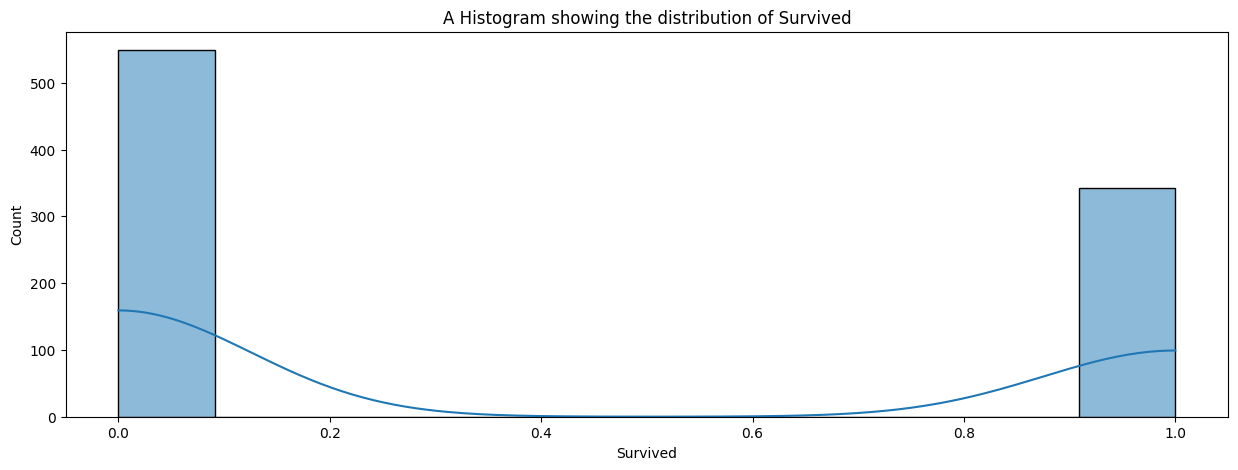

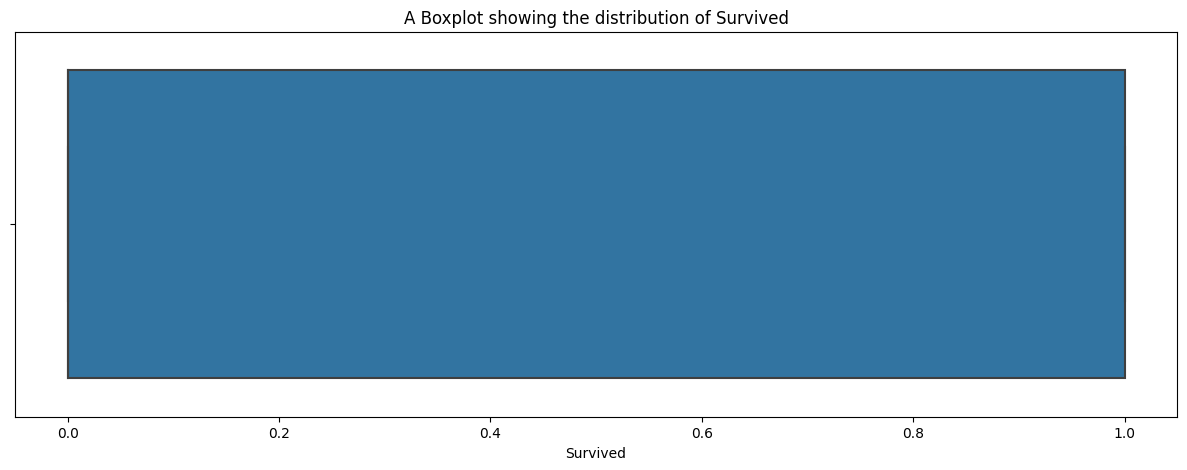

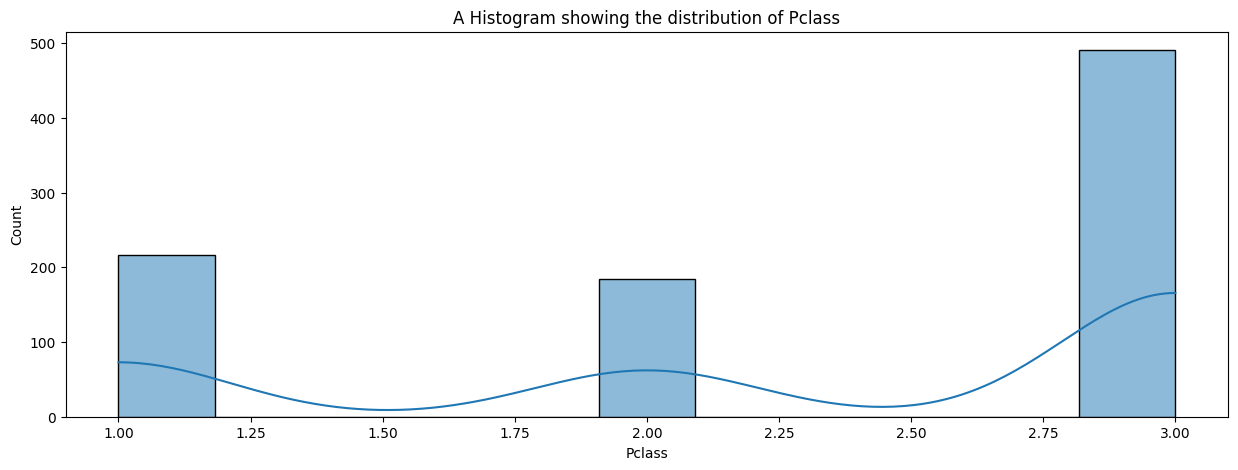

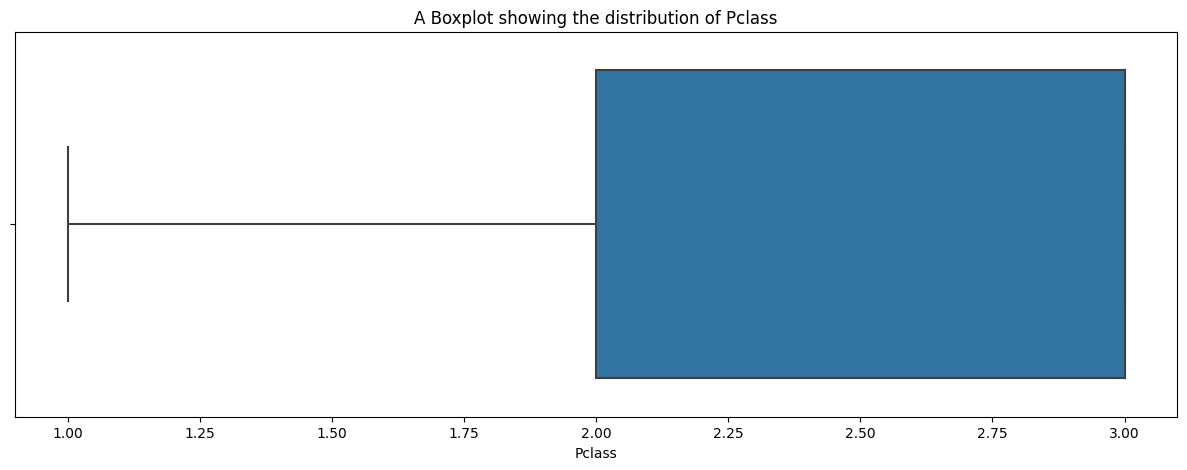

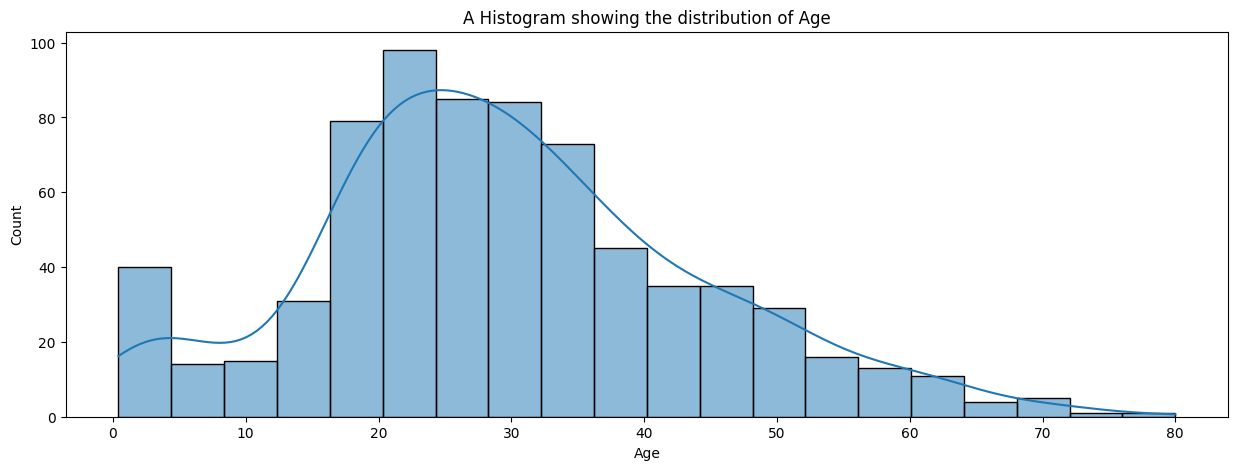

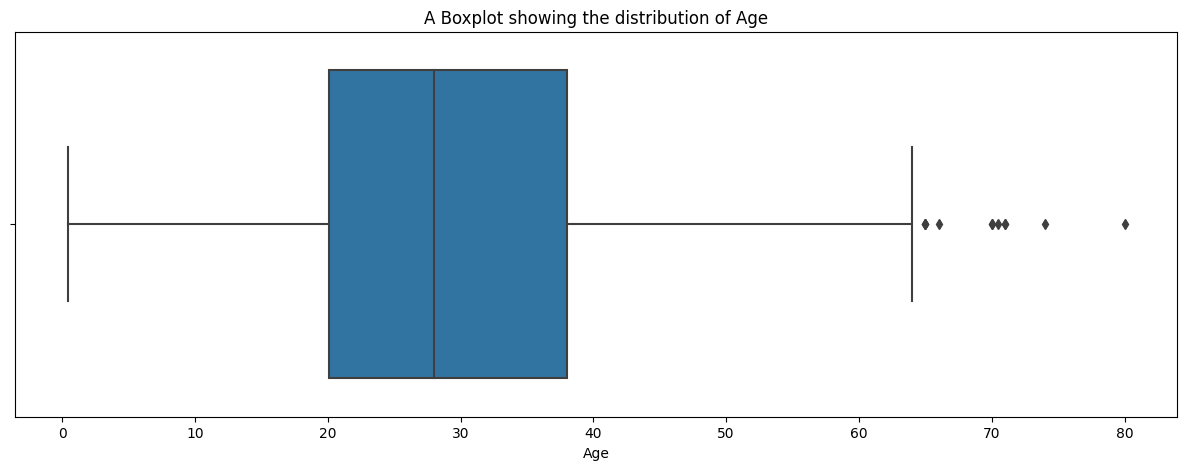

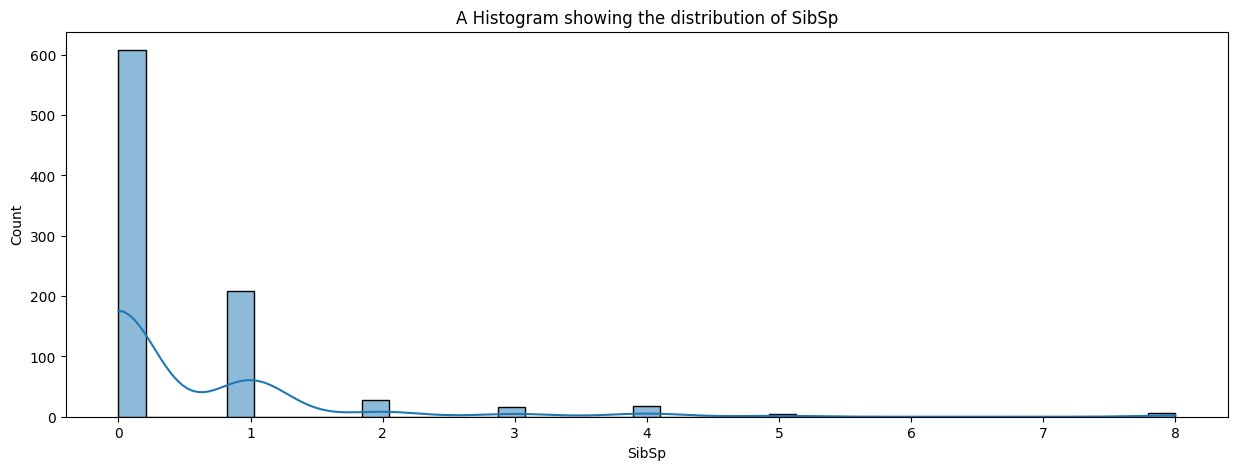

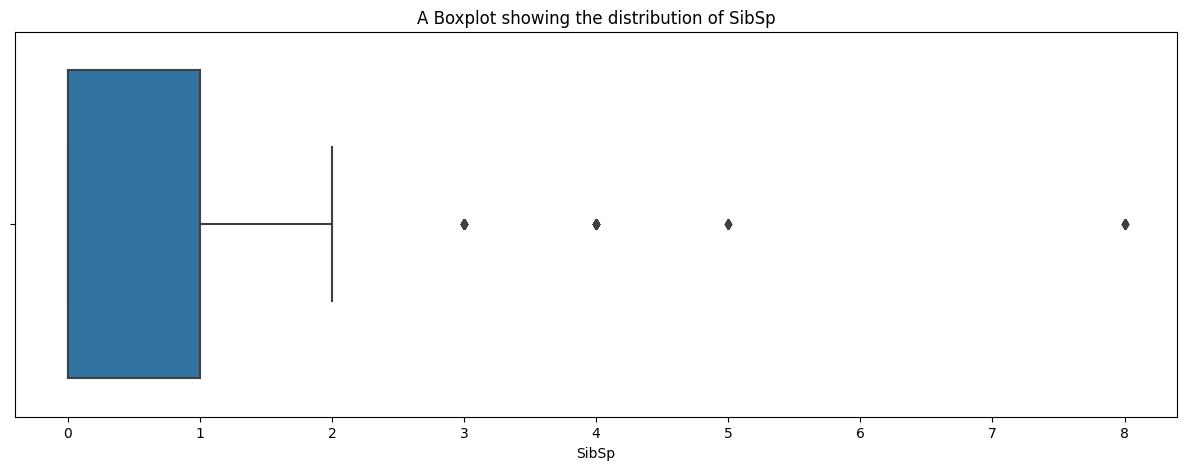

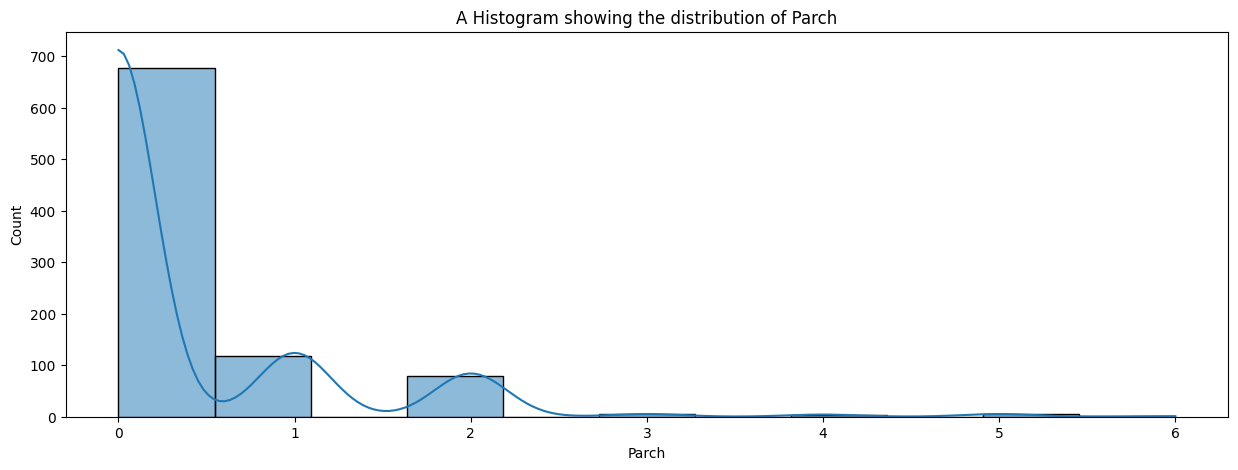

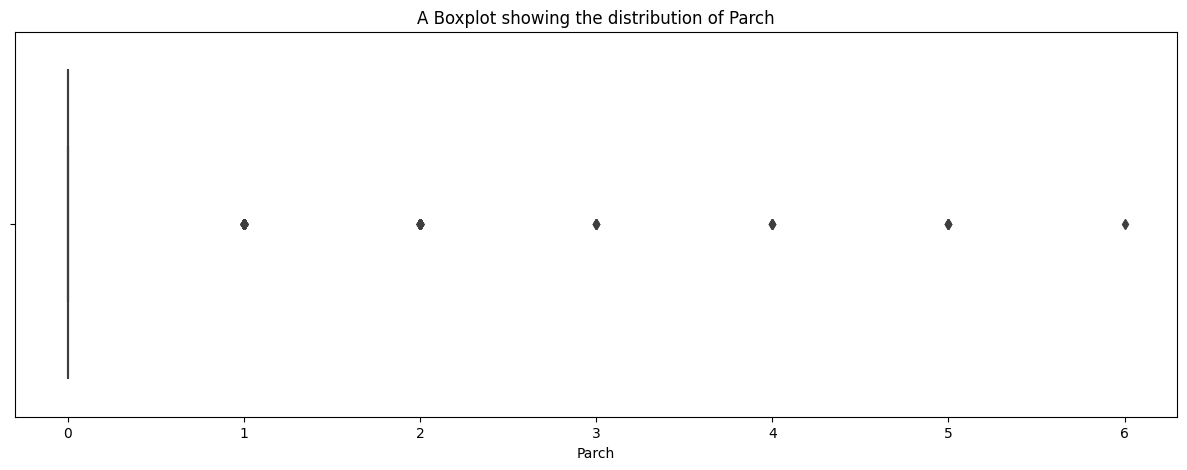

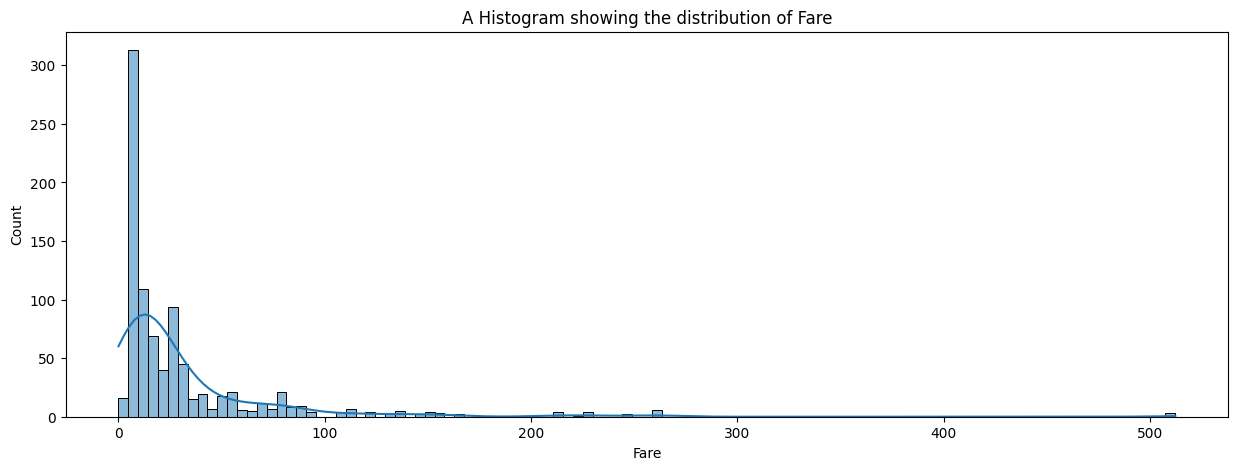

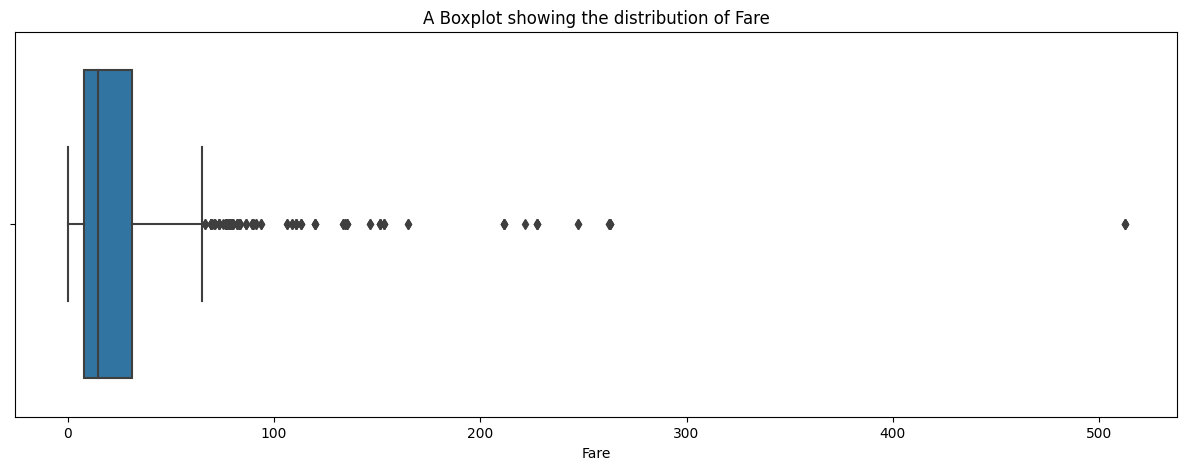

In [8]:
# A loop to create the graphs
for col in num_cols:
    plt.figure(figsize=(15,5))
    sns.histplot(data=titanic, x=col, kde=True)
    plt.title(f"A Histogram showing the distribution of {col}")
    plt.xlabel(f"{col}")

    plt.figure(figsize=(15,5))
    sns.boxplot(data=titanic, x=col)
    plt.title(f"A Boxplot showing the distribution of {col}")
    plt.xlabel(f"{col}")

In [9]:
# Visualizing Categorical columns
cat_cols = titanic.select_dtypes(include="object").columns
print(cat_cols)

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


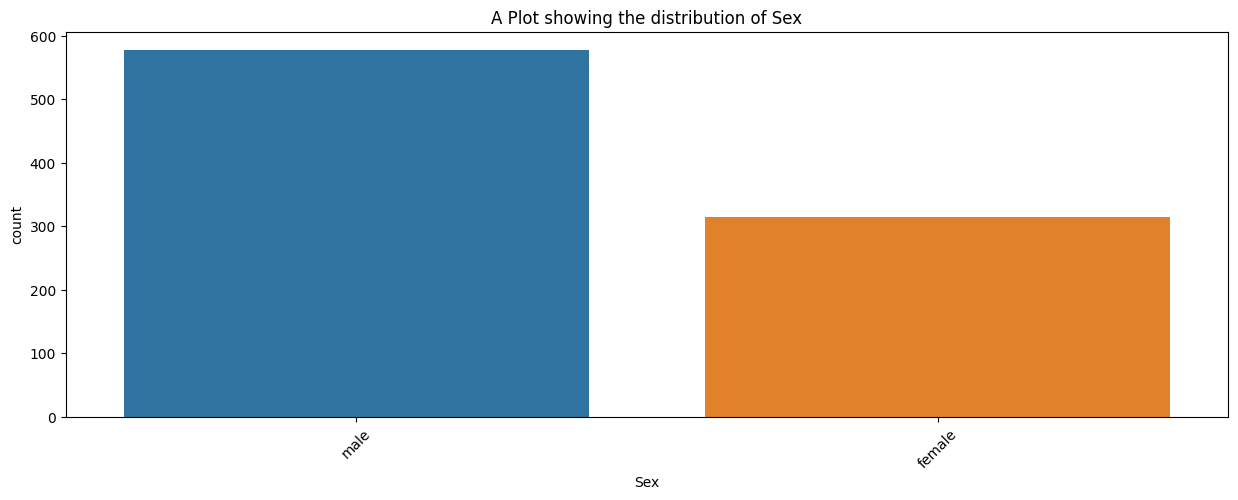

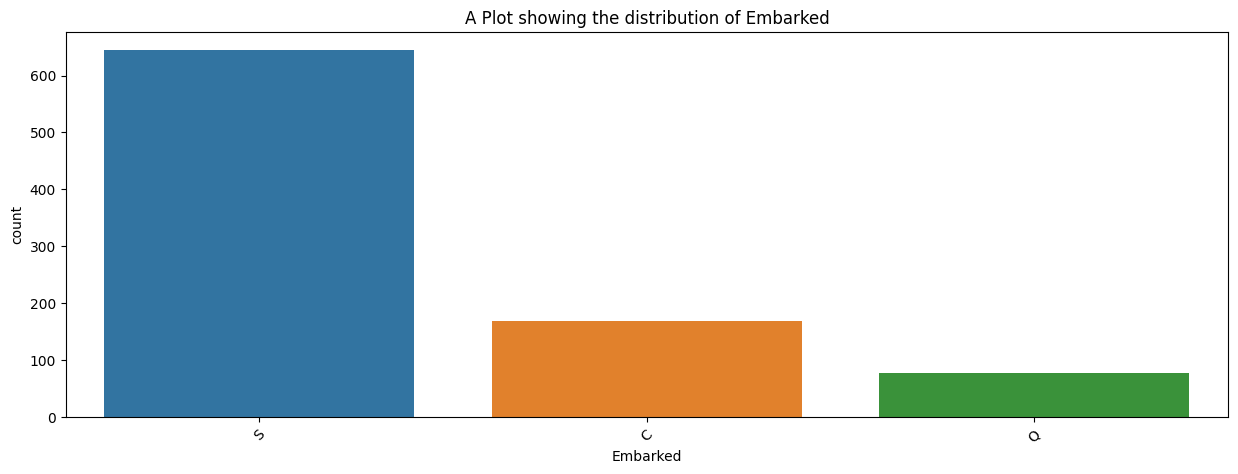

In [10]:
not_included = ['Name', 'Ticket']
for col in cat_cols:
    if col not in not_included:
        plt.figure(figsize=(15,5))
        sns.countplot(data=titanic, x=col)
        plt.title(f"A Plot showing the distribution of {col}")
        plt.xlabel(f"{col}")
        plt.xticks(rotation=45)


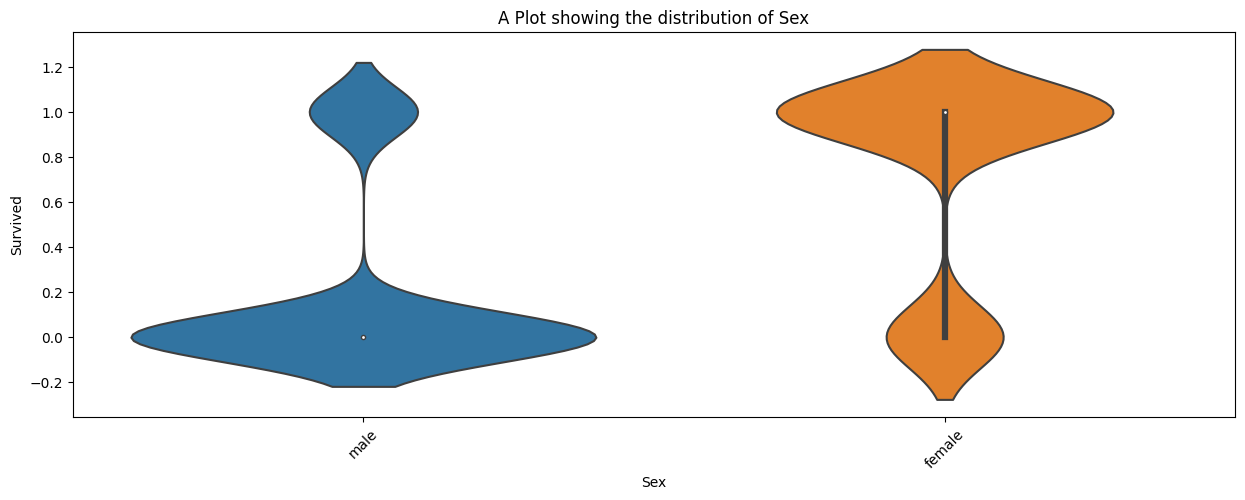

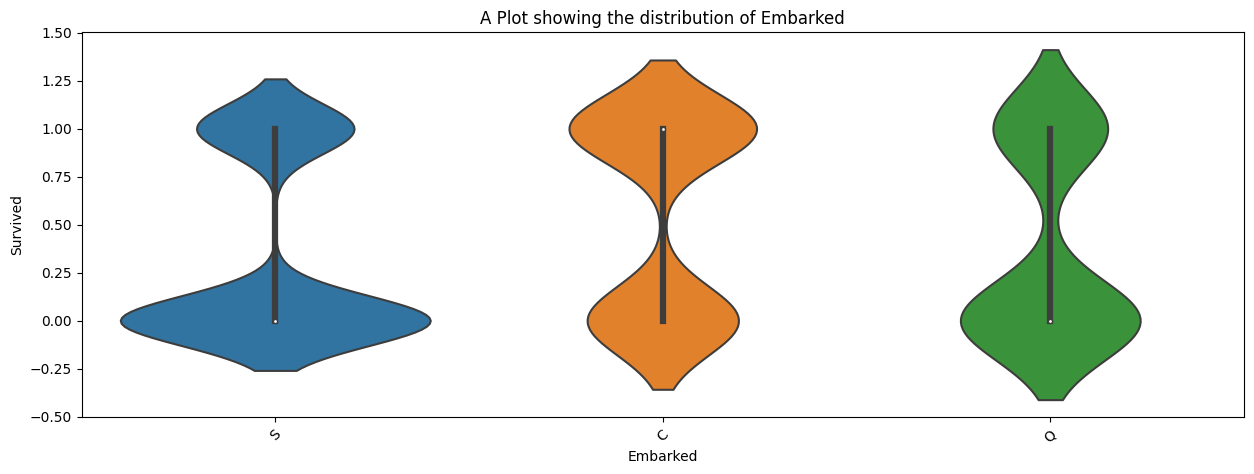

In [11]:
# Visualizing 
for col in cat_cols:
    if col not in not_included:
        plt.figure(figsize=(15,5))
        sns.violinplot(data=titanic, x=col, y="Survived")
        plt.title(f"A Plot showing the distribution of {col}")
        plt.xlabel(f"{col}")
        plt.xticks(rotation=45)

In [12]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Text(0, 0.5, 'Survived')

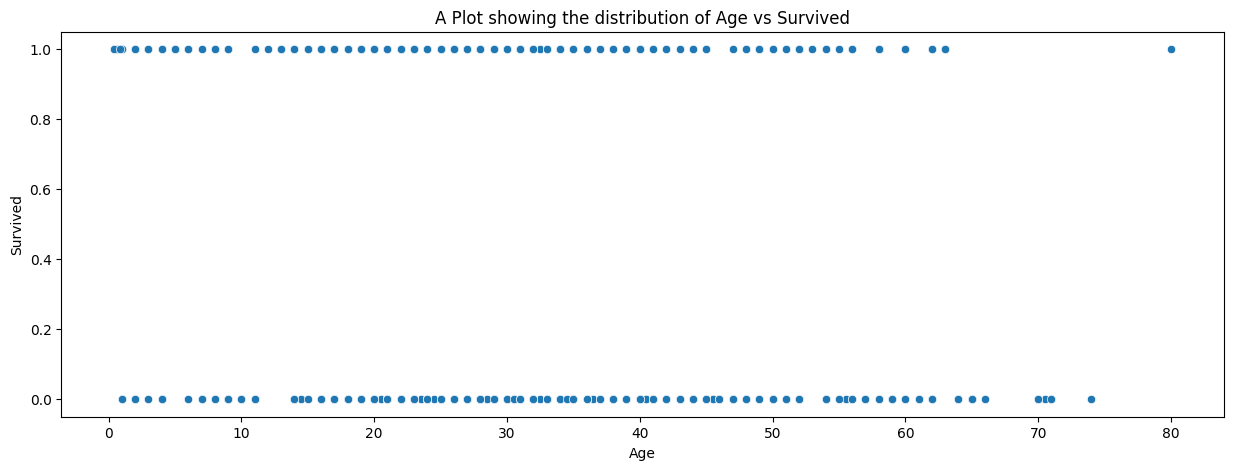

In [13]:
# Plotting numeric cols vs categorical cols
plt.figure(figsize=(15,5))
sns.scatterplot(data=titanic, x="Age", y="Survived")
plt.title(f"A Plot showing the distribution of Age vs Survived")
plt.xlabel("Age") 
plt.ylabel("Survived")

### Groupby Questions

In [14]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
# Grouping Sex by SibSp
gender_sp = pd.DataFrame(titanic.groupby("Sex")["SibSp"].sum())
print(gender_sp)

        SibSp
Sex          
female    218
male      248


In [16]:
gender_sp.sort_values(by="SibSp", ascending=False)

,SibSp
Sex,
male,248
female,218


Text(0, 0.5, 'Survived')

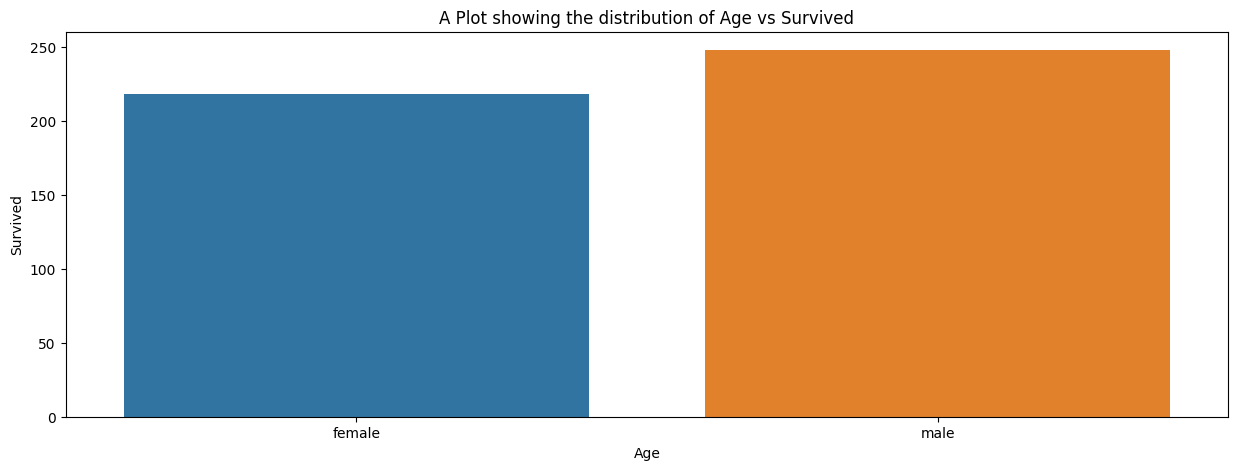

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(data=gender_sp, x=gender_sp.index, y="SibSp")
plt.title(f"A Plot showing the distribution of Age vs Survived")
plt.xlabel("Age") 
plt.ylabel("Survived")

In [18]:
personal_details = titanic.groupby(["Name", "Sex"])["Age"].mean()
print(personal_details)

Name                                   Sex   
Abbing, Mr. Anthony                    male      42.0
Abbott, Mr. Rossmore Edward            male      16.0
Abbott, Mrs. Stanton (Rosa Hunt)       female    35.0
Abelson, Mr. Samuel                    male      30.0
Abelson, Mrs. Samuel (Hannah Wizosky)  female    28.0
                                                 ... 
de Mulder, Mr. Theodore                male      30.0
de Pelsmaeker, Mr. Alfons              male      16.0
del Carlo, Mr. Sebastiano              male      29.0
van Billiard, Mr. Austin Blyler        male      40.5
van Melkebeke, Mr. Philemon            male       NaN
Name: Age, Length: 891, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [19]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# drop columsn with unique values eg name- does not give us info that tells us whether the person survived or not.

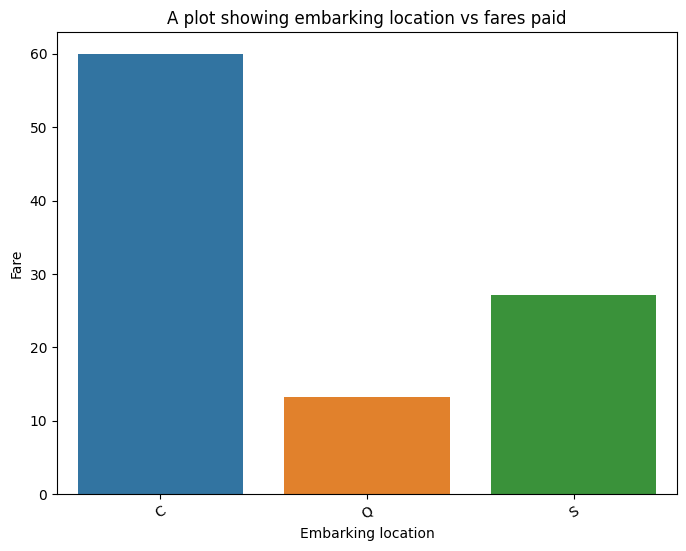

In [20]:
# visualize embarked vs fare 

m_class =pd.DataFrame(titanic.groupby("Embarked")["Fare"].mean())
plt.figure(figsize=(8,6))
sns.barplot (data=m_class, x= m_class.index, y="Fare")
plt.title ("A plot showing embarking location vs fares paid")
plt.xticks (rotation=30)
plt.xlabel("Embarking location")
plt.show()

# class c paid most money, then class q, then s

              Age
Sex              
male    30.726645
female  27.915709


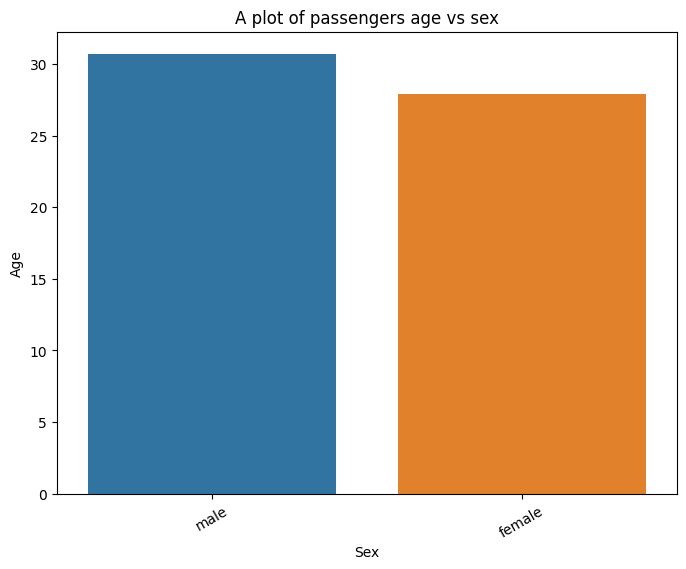

In [21]:
gender_age = pd.DataFrame(titanic.groupby("Sex")["Age"].mean())

gender_age_1= gender_age.sort_values(by="Age", ascending=False)
print(gender_age_1)

plt.figure(figsize=(8,6))
sns.barplot (data=gender_age_1, x= gender_age_1.index, y="Age")
plt.title ("A plot of passengers age vs sex")
plt.xticks (rotation=30)
plt.xlabel("Sex")
plt.show()

#### converting categoricals to numeric

In [22]:
titanic.info()
# numerics: survived, pclass, Sibsp, parch

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [23]:
# check missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [24]:
# fill missing age values with mean
mean_1= titanic["Age"].mean()
titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)
               

/tmp/ipykernel_13/490430710.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)


In [25]:
# missing
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [26]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)

/tmp/ipykernel_13/3087014585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)


In [27]:
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [28]:
# drop name column
titanic.drop(["Name", "Ticket"], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [29]:
# one hot encoding embarked
en_columns=titanic[["Embarked"]]
embarked =pd.get_dummies(en_columns, columns=["Embarked"])
embarked_1 =embarked.astype(int)
titanic=pd.concat([titanic,embarked_1], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,1


In [30]:
# encoding - changing age (categoric) to numeric
encoder =LabelEncoder()
titanic["Gender"]=encoder.fit_transform(titanic["Sex"])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Gender
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,1


In [31]:
# Dropping embarked columns 
titanic.drop(["Embarked", "Sex"], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Gender
0,0,3,22.0,1,0,7.2500,0,0,1,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,1


#### SPLITTNG splitting data into training and test sets

In [32]:
X=titanic.drop("Survived", axis=1)
y=titanic[["Survived"]]

X.shape

(891, 9)

In [33]:
# split 
X_train, X_test, y_train, y_test=train_test_split (X, y, test_size=0.25, random_state=42)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Gender
298,1,29.699118,0,0,30.5000,0,0,1,1
884,3,25.000000,0,0,7.0500,0,0,1,1
247,2,24.000000,0,2,14.5000,0,0,1,0
478,3,22.000000,0,0,7.5208,0,0,1,1
305,1,0.920000,1,2,151.5500,0,0,1,1


In [34]:
# scaling data
scaler =StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Gender
0,-1.620517,0.017145,-0.467660,-0.468878,-0.032568,-0.460805,-0.308354,0.595793,0.722247
1,0.809349,-0.344320,-0.467660,-0.468878,-0.487331,-0.460805,-0.308354,0.595793,0.722247
2,-0.405584,-0.421242,-0.467660,2.046870,-0.342854,-0.460805,-0.308354,0.595793,-1.384569
3,0.809349,-0.575085,-0.467660,-0.468878,-0.478201,-0.460805,-0.308354,0.595793,0.722247
4,-1.620517,-2.196596,0.376656,2.046870,2.314937,-0.460805,-0.308354,0.595793,0.722247


In [35]:
# move data from here to Colab. try smuote. use best_estimator_score; what it does in randomforest, code it

In [36]:
# Hyperparameter tuning on random forest

model=RandomForestClassifier()
params = {
    "n_estimators": np.arange(200, 250),
    "max_depth": np.arange(2,50)}
grid = RandomizedSearchCV(model, params, scoring="accuracy", cv=5, n_iter=20, n_jobs=-1, random_state=42)

grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
print(grid.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

{'n_estimators': 230, 'max_depth': 4}
0.8218269554483222



# Interpretation of the Output
- Best Parameters Found:
{'n_estimators': 230, 'max_depth': 4}
This means that among the combinations tested, a forest of 230 trees with a maximum depth of 4 yielded the highest cross-validated accuracy.

- Best Cross-Validated Accuracy:
0.8203 (or ~82.03%)
This is the average accuracy across the 5 folds during cross-validation. It reflects how well your model generalizes to unseen data under these settings.


🧠 What It Suggests
- Shallow Trees Work Best Here: A max_depth of 4 is relatively low, which implies that deeper trees might be overfitting or not adding value. Your data might be well-separated with simpler decision boundaries.
- More Trees Help: n_estimators=230 suggests that a larger ensemble improves stability and performance—but going beyond 230 may not yield significant gains.
- Model Is Generalizing Well: An 82% accuracy in cross-validation is solid, especially if your classes are balanced and the problem isn’t trivial.
